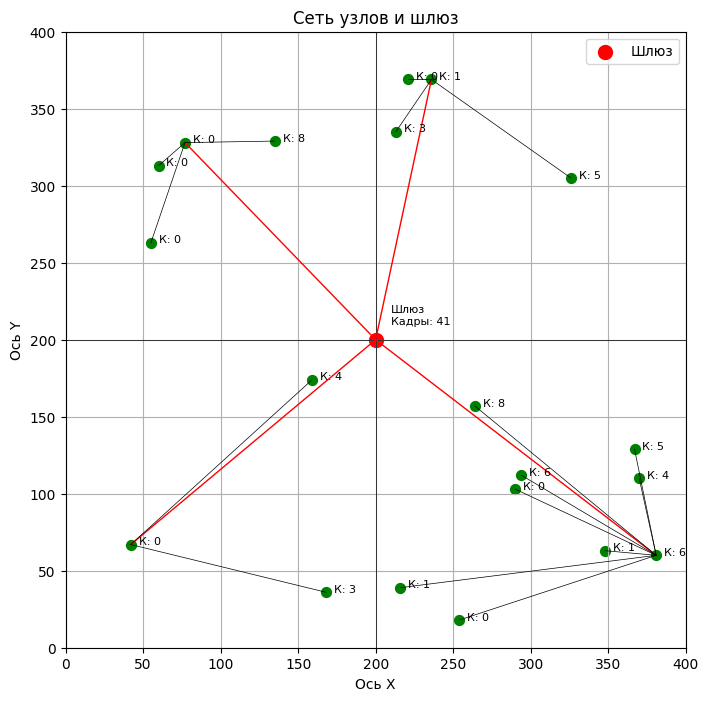

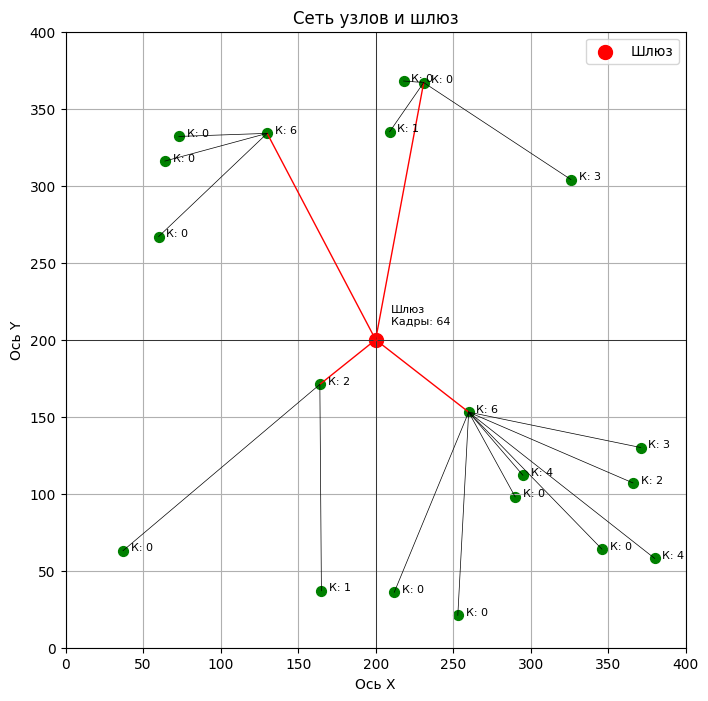

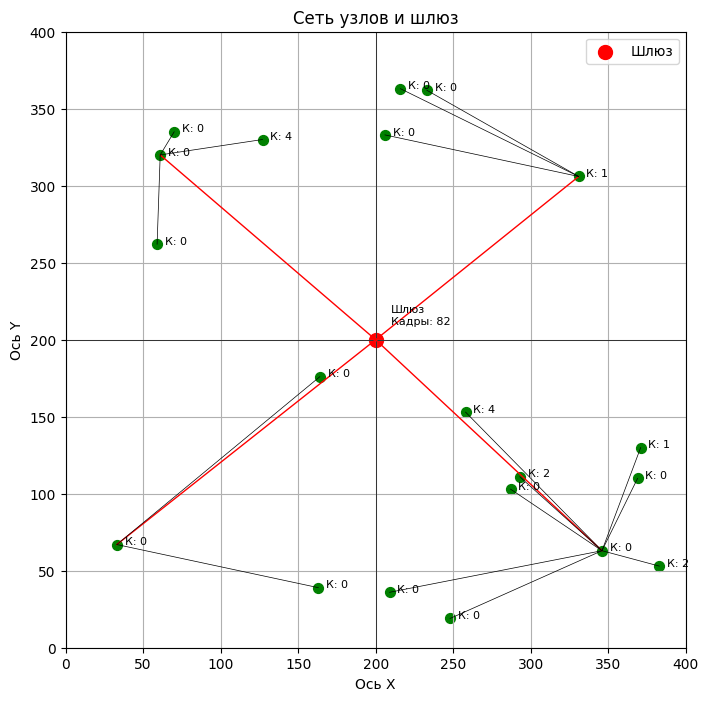

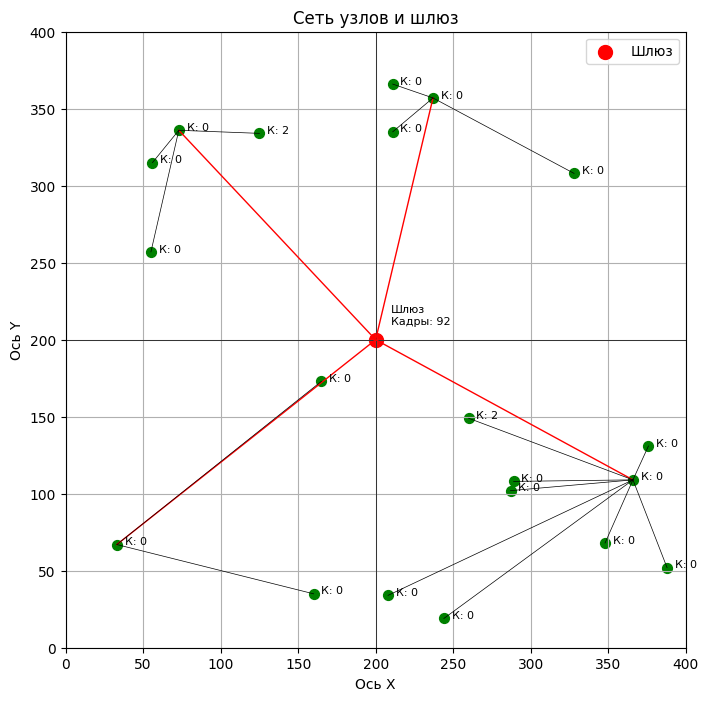

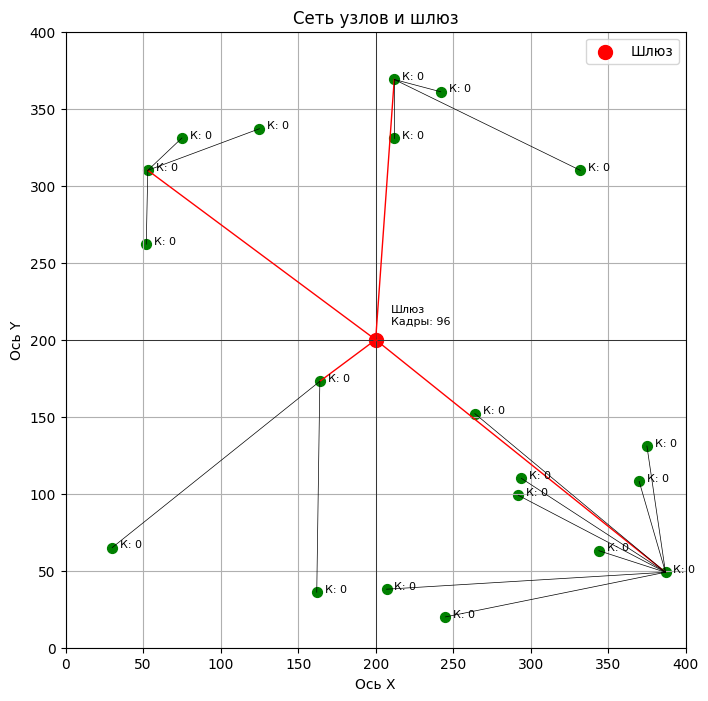


Количество узлов: 20
Общее количество кадров переданных в шлюз: 96
Узел 0: (X: 162, Y: 36, кадров: 0)
Узел 1: (X: 264, Y: 152, кадров: 0)
Узел 2: (X: 164, Y: 173, кадров: 0)
Узел 3: (X: 52, Y: 262, кадров: 0)
Узел 4: (X: 294, Y: 110, кадров: 0)
Узел 5: (X: 53, Y: 310, кадров: 0)
Узел 6: (X: 30, Y: 65, кадров: 0)
Узел 7: (X: 387, Y: 49, кадров: 0)
Узел 8: (X: 212, Y: 331, кадров: 0)
Узел 9: (X: 125, Y: 337, кадров: 0)
Узел 10: (X: 207, Y: 38, кадров: 0)
Узел 11: (X: 332, Y: 310, кадров: 0)
Узел 12: (X: 75, Y: 331, кадров: 0)
Узел 13: (X: 292, Y: 99, кадров: 0)
Узел 14: (X: 344, Y: 63, кадров: 0)
Узел 15: (X: 370, Y: 108, кадров: 0)
Узел 16: (X: 245, Y: 20, кадров: 0)
Узел 17: (X: 212, Y: 369, кадров: 0)
Узел 18: (X: 375, Y: 131, кадров: 0)
Узел 19: (X: 242, Y: 361, кадров: 0)


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Node:
    def __init__(self, x, y, fpr=2, frames=0, energy=0):
        self.x = x  # Координата X
        self.y = y  # Координата Y
        self.fpr = fpr  # Частота передачи кадров (Frame Per Rate)
        self.frames = frames  # Количество кадров
        self.energy = energy  # Энергия узла
        self.random_value = random.random()  # Случайное значение для выбора главы кластера

    def __repr__(self):
        return f"Узел({self.x}, {self.y}, кадров: {self.frames})"

class NetworkSimulation:
    def __init__(self, num_nodes):
        self.num_nodes = num_nodes  # Количество узлов
        self.nodes = self.generate_nodes()  # Генерация узлов
        self.frames_in_gateway = 0  # Общее количество кадров в шлюзе

    def generate_nodes(self):
        nodes = []
        for _ in range(self.num_nodes):
            x = random.randint(10, 390)  # Случайное значение X (между 10 и 390)
            y = random.randint(10, 390)  # Случайное значение Y (между 10 и 390)
            frames = random.randint(1, 10)  # Случайное количество кадров (от 1 до 10)
            nodes.append(Node(x, y, frames=frames))  # Добавляем узел в список
        return nodes

    def draw_network(self):
        plt.figure(figsize=(8, 8))
        plt.xlim(0, 400)
        plt.ylim(0, 400)
        plt.axhline(200, color='black', linewidth=0.5)
        plt.axvline(200, color='black', linewidth=0.5)

        # Рисуем шлюз
        plt.scatter(200, 200, color='red', s=100, marker='o', label='Шлюз')
        plt.text(210, 210, f'Шлюз\nКадры: {self.frames_in_gateway}', fontsize=8)

        # Рисуем узлы (цвет изменен на зеленый)
        for i, node in enumerate(self.nodes):
            plt.scatter(node.x, node.y, color='green', s=50, marker='o')  # Здесь цвет узлов изменен на зеленый
            plt.text(node.x + 5, node.y, f'К: {node.frames}', fontsize=8)

        # Рисуем связи узлов со шлюзом
        connected_nodes_indices = self.get_connected_nodes_to_gateway()
        for i in connected_nodes_indices:
            plt.plot([200, self.nodes[i].x], [200, self.nodes[i].y], color='red', linewidth=1)
            # Рисуем связи от узла к соседним
            self.draw_connections_to_neighbours(i)

        plt.title('Сеть узлов и шлюз')
        plt.xlabel('Ось X')
        plt.ylabel('Ось Y')
        plt.legend()
        plt.grid()
        plt.show()

    def draw_connections_to_neighbours(self, gateway_index):
        """Рисует связи от узла, который соединяется со шлюзом, ко всем узлам в четверти."""
        gateway_node = self.nodes[gateway_index]

        # Ищем узлы в одной четверти
        for i, node in enumerate(self.nodes):
            if i != gateway_index and self.same_quadrant(gateway_node, node):
                plt.plot([gateway_node.x, node.x], [gateway_node.y, node.y], color='black', linewidth=0.5)

    def same_quadrant(self, node1, node2):
        """Проверяет, находятся ли узлы в одной четверти."""
        return (node1.x > 200) == (node2.x > 200) and (node1.y > 200) == (node2.y > 200)

    def get_connected_nodes_to_gateway(self):
        """Получить индексы узлов, соединяющихся со шлюзом"""
        partitions = [[], [], [], []]  # Списки для каждого квадранта
        for i, node in enumerate(self.nodes):
            if node.x > 200 and node.y < 200:
                partitions[0].append(i)  # I четверть
            elif node.x < 200 and node.y < 200:
                partitions[1].append(i)  # II четверть
            elif node.x < 200 and node.y > 200:
                partitions[2].append(i)  # III четверть
            elif node.x > 200 and node.y > 200:
                partitions[3].append(i)  # IV четверть

        # По одному узлу из каждой четверти
        connected_nodes_indices = []
        for partition in partitions:
            if partition:
                connected_nodes_indices.append(random.choice(partition))  # Выбираем случайный узел из каждой четверти

        return connected_nodes_indices

    def process_frames(self):
        cluster_head_index = -1
        T = 0.2 / (1 - 0.2 * (1 % (1 / 0.2)))  # Порог для выбора главы кластера

        # Определяем главу кластера
        for i, node in enumerate(self.nodes):
            if node.random_value < T:
                cluster_head_index = i
                break

        total_frames = 0  # Общее количество кадров
        if cluster_head_index >= 0:
            cluster_head = self.nodes[cluster_head_index]  # Глава кластера
            total_frames = cluster_head.frames  # Сохраняем количество кадров
            cluster_head.frames = 0  # Обнуляем количество кадров у главы кластера

            # Обновляем количество кадров у других узлов
            for i in range(len(self.nodes)):
                if i != cluster_head_index:
                    if self.nodes[i].frames >= 2:
                        self.nodes[i].frames -= 2
                        total_frames += 2
                    elif self.nodes[i].frames == 1:
                        self.nodes[i].frames = 0
                        total_frames += 1

            self.frames_in_gateway += total_frames  # Обновляем общее количество кадров в шлюзе

    def update_node_positions(self):
        """Обновление координат узлов (изменение в каждом раунде)"""
        for node in self.nodes:
            node.x += random.randint(-5, 5)  # Случайное смещение по X
            node.y += random.randint(-5, 5)  # Случайное смещение по Y
            # Ограничиваем координаты узлов в пределах 0-400
            node.x = max(10, min(node.x, 390))
            node.y = max(10, min(node.y, 390))

    def run_simulation(self, rounds=5):
        for _ in range(rounds):  # Ограничиваем количество раундов
            self.update_node_positions()  # Обновляем позиции узлов
            self.process_frames()  # Обработка кадров
            self.draw_network()  # Рисуем сеть

        # Вывод статистики
        self.print_statistics()

    def print_statistics(self):
        """Вывод статистики по узлам и кадрам"""
        print(f"\nКоличество узлов: {self.num_nodes}")
        print(f"Общее количество кадров переданных в шлюз: {self.frames_in_gateway}")
        for i, node in enumerate(self.nodes):
            print(f"Узел {i}: (X: {node.x}, Y: {node.y}, кадров: {node.frames})")


# Пример использования
num_nodes = 20  # Количество узлов (можно изменить)
network_simulation = NetworkSimulation(num_nodes)
network_simulation.run_simulation(rounds=5)  # Запуск симуляции на 5 раундов